In [1]:
from IPython.display import Image

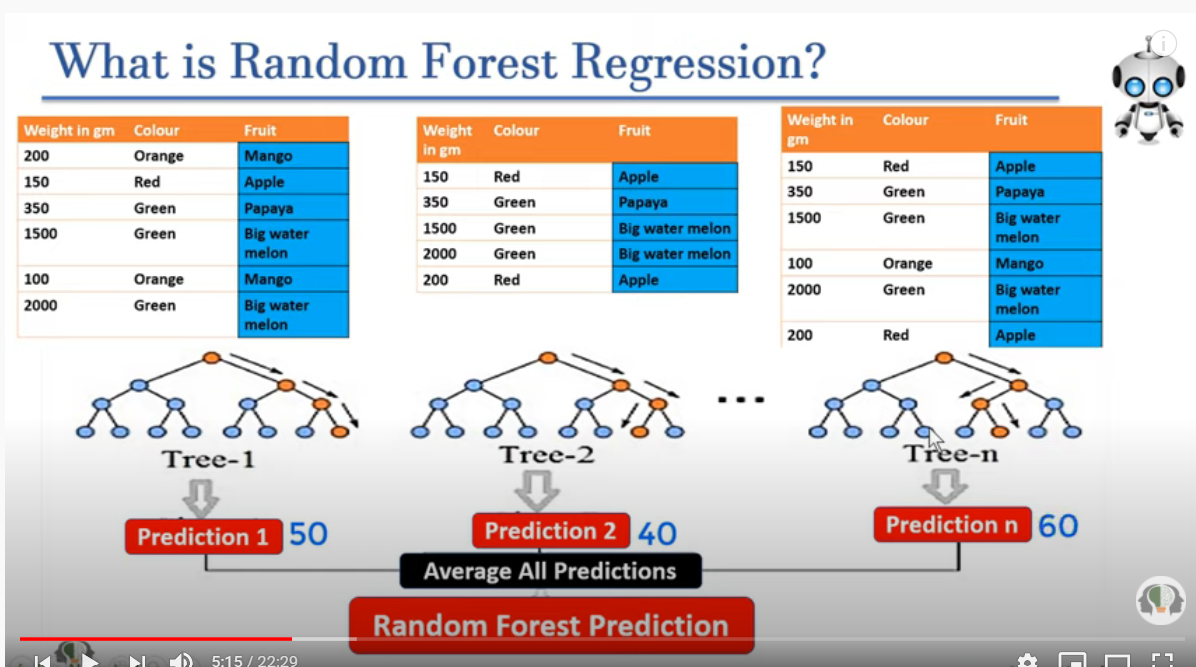

In [3]:
Image(filename="working.png",width=800)

In [4]:
# Working is similar to that of random forest regression. The only difference is that we take the average value of all
# the predictions and that becomes the predicted value for the test data.

In [6]:
# The ans for the above image will be 50

In [7]:
import pandas as pd

In [8]:
path = r"https://drive.google.com/uc?export=download&id=1xxDtrZKfuWQfl-6KA9XEd_eatitNPnkB" 
df = pd.read_csv(path)
pd.set_option("display.max_columns",None)

In [9]:
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_7th Phase JP Nagar,location_Yelahanka,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_Chandapura,location_HSR Layout,location_Hennur,location_Ramamurthy Nagar,location_Ramagondanahalli,location_Kaggadasapura,location_Kundalahalli,location_Koramangala,location_Hulimavu,location_Budigere,location_Hoodi,location_Malleshwaram,location_Hegde Nagar,location_8th Phase JP Nagar,location_Gottigere,location_JP Nagar,location_Yeshwanthpur,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Vijayanagar,location_Kengeri,location_Brookefield,location_Sahakara Nagar,location_Hosa Road,location_Old Airport Road,location_Bommasandra,location_Balagere,location_Green Glen Layout,location_Old Madras Road,location_Rachenahalli,location_Panathur,location_Kudlu Gate,location_Thigalarapalya,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Talaghattapura,location_Mysore Road,location_Kadugodi,location_Frazer Town,location_Dodda Nekkundi,location_Devanahalli,location_Kanakapura,location_Attibele,location_Anekal,location_Lakshminarayana Pura,location_Nagarbhavi,location_Ananth Nagar,location_5th Phase JP Nagar,location_TC Palaya,location_CV Raman Nagar,location_Kengeri Satellite Town,location_Kudlu,location_Jalahalli,location_Subramanyapura,location_Bhoganhalli,location_Doddathoguru,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Now we split the data into independent and dependent variables.
X=df.drop(columns="price")
y=df["price"]

In [11]:
# Now we split them into traininga and test dataset.
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [13]:
# Now we train our model... note that we donot feature scale data while using decision tree

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
classifier=RandomForestRegressor(n_estimators=100,criterion="mse")

In [16]:
classifier.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
classifier.score(X_test,y_test)

0.9215029455400825

In [20]:
# You can increase the score by increasing the no. of decision trees i.e., increasing the n_estimators value.
# Note that as you increase the n_estimators, our model tends to become overfit.

In [19]:
classifier_1=RandomForestRegressor(n_estimators=100,criterion="mse")
classifier_1.fit(X_train,y_train)
classifier_1.score(X_test,y_test)

0.9318611186421121

In [21]:
# Sometimes the score becomes less of the model with more n_estimators than that of the model with less n_estimators. This
# is so because, increasing the n_estimators tends to increase the accuracy of the training dataset and not the test
# dataset and hence our score may also get reduced.

In [23]:
# Now we predict the price of the house
classifier_1.predict([X_test.iloc[-1,:]])[0]

142.51

In [25]:
y_test.iloc[-1]

145.0

In [26]:
# You can see that our model predicted the value close to the original value.

In [27]:
classifier_1.predict(X_test)

array([ 54.2406,  70.    ,  73.7203, ..., 119.51  ,  44.671 , 142.51  ])

In [28]:
y_test

3040     54.0
3444     70.0
5238     74.0
1563     56.1
1211    115.0
        ...  
1364     55.0
5318     67.0
2700    119.0
891      45.0
4868    145.0
Name: price, Length: 1780, dtype: float64

In [ ]:
# You can see that our model is trained well to predict the prices of the house in Banglore.